In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your model
model1 = load_model('model1_resnet50/model1.h5')
model2 = load_model('model2_vgg16/model2.h5')
model3 = load_model('model3_senet50/model3.h5')

2024-02-22 17:48:19.520261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd

In [3]:
y_test=pd.read_csv('y_test.csv')

In [4]:
y_test.drop(y_test.columns[0],axis=1,inplace=True)

In [5]:
y_test.head()

,0
0,3
1,3
2,4
3,3
4,4


# RESNET 50

In [6]:
import pickle

In [7]:
y_pred1=pd.read_csv('new_model1_resnet50/y_pred_new_df_model1.csv')

In [8]:
y_pred1.drop(y_pred1.columns[0],axis=1,inplace=True)

In [9]:
y_pred1.head()

,0,1,2,3,4,5,6
0,1.071447e-33,2.801738e-36,1.269502e-30,1.000000,8.458789e-19,1.487494e-19,5.051446e-23
1,2.211274e-13,5.709687e-16,1.260009e-12,1.000000,3.294036e-08,1.308007e-09,1.407373e-10
2,2.900607e-06,1.376704e-12,2.533199e-06,0.000001,9.999770e-01,1.634578e-05,3.765130e-08
3,4.479752e-08,3.944346e-11,7.726433e-09,0.999991,8.268533e-06,1.511885e-07,1.288230e-07
4,4.105433e-05,4.964703e-11,3.809559e-05,0.000004,9.997056e-01,2.113976e-04,9.975535e-08


In [10]:
import numpy as np

In [11]:
y_pred1=np.asarray(y_pred1)

In [12]:
np.argmax(y_pred1[0:6])

3

In [13]:
np.argmax(y_pred1[0])


3

In [14]:
y_pred1__=[]
for l in y_pred1:
    y_pred1__.append(np.argmax(l))

In [15]:
y_pred1=y_pred1__

## CONFUSION MATRIX

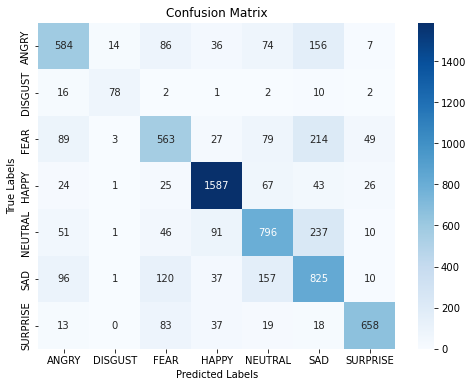

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Define class labels
class_labels = ["ANGRY", "DISGUST", "FEAR","HAPPY", "NEUTRAL", "SAD","SURPRISE"]

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## CLASSIFICATION REPORT

In [17]:
from sklearn.metrics import classification_report

In [18]:
report = classification_report(y_test, y_pred1)

# Print classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.61      0.64       957
           1       0.80      0.70      0.75       111
           2       0.61      0.55      0.58      1024
           3       0.87      0.90      0.88      1773
           4       0.67      0.65      0.66      1232
           5       0.55      0.66      0.60      1246
           6       0.86      0.79      0.83       828

    accuracy                           0.71      7171
   macro avg       0.72      0.69      0.70      7171
weighted avg       0.71      0.71      0.71      7171



## ACCURACY,PRECISION ,RECALL ,F1-CORE

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4%}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 70.9943%
Precision: 0.7142
Recall: 0.7099
F1-Score: 0.7105


## TRAIN VS TEST ACCURACY

In [20]:
import pickle

# Specify the path to your pickle file
file_path = "model1_resnet50/history1.pickle"

# Open the pickle file in binary mode
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    history1 = pickle.load(file)

# Now, 'data' contains the content of the pickle file
print(history1)

Minimum validation loss: 0.9109695131304171


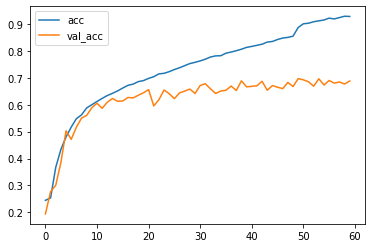

In [21]:
history_df = pd.DataFrame(history1.history)
history_df.loc[:, ['acc', 'val_acc']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# VGG16

In [22]:
import pickle

# Specify the path to your pickle file
file_path = "model2_vgg16/y_pred_train_model2.pickle"

# Open the pickle file in binary mode
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    y_pred2 = pickle.load(file)

# Now, 'data' contains the content of the pickle file
# print(data)

In [23]:
y_pred2=pd.read_csv('model2_vgg16/y_pred_new_df_model2.csv')
y_pred2.drop(y_pred2.columns[0],axis=1,inplace=True)

In [24]:
y_pred2=np.asarray(y_pred2)

In [25]:
len(y_pred2)

7171

In [26]:
y_pred2__=[]
for l in y_pred2:
    y_pred2__.append(np.argmax(l))

In [27]:
y_pred2[0]

array([1.45140643e-06, 1.53162338e-09, 2.98028021e-06, 9.94664550e-01,
       5.02359122e-03, 3.02742956e-06, 3.04416957e-04])

In [28]:
y_pred2=y_pred2__

## CONFUSION MATRIX

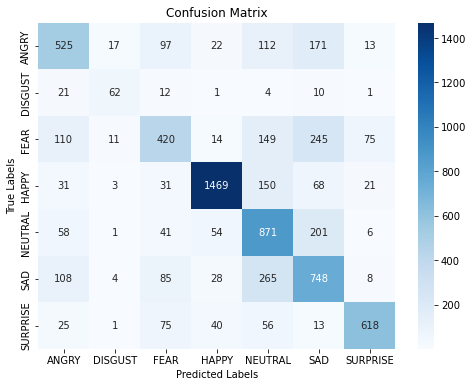

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Define class labels
class_labels = ["ANGRY", "DISGUST", "FEAR","HAPPY", "NEUTRAL", "SAD","SURPRISE"]

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## CLASSIFICATION REPORT

In [30]:
report = classification_report(y_test, y_pred2)

# Print classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57       957
           1       0.63      0.56      0.59       111
           2       0.55      0.41      0.47      1024
           3       0.90      0.83      0.86      1773
           4       0.54      0.71      0.61      1232
           5       0.51      0.60      0.55      1246
           6       0.83      0.75      0.79       828

    accuracy                           0.66      7171
   macro avg       0.65      0.63      0.64      7171
weighted avg       0.67      0.66      0.66      7171



## ACCURACY,PRECISION ,RECALL ,F1-CORE

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4%}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 65.7231%
Precision: 0.6700
Recall: 0.6572
F1-Score: 0.6588


## TRAIN VS TEST ACCURACY

In [32]:
import pickle

# Specify the path to your pickle file
file_path = "model2_vgg16/history2.pickle"

# Open the pickle file in binary mode
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    history2 = pickle.load(file)

# Now, 'data' contains the content of the pickle file
print(history2)

Minimum validation loss: 0.965409682449082


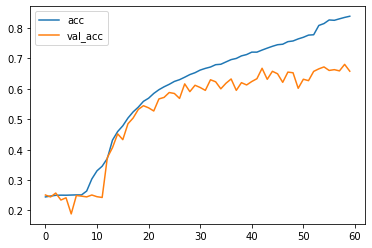

In [33]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['acc', 'val_acc']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# SENET50

In [34]:
y_pred3=pd.read_csv('model3_senet50/y_pred_new_df_model3.csv')
y_pred3.drop(y_pred3.columns[0],axis=1,inplace=True)

In [35]:
y_pred3=np.asarray(y_pred3)

In [36]:
y_pred3__=[]
for l in y_pred3:
    y_pred3__.append(np.argmax(l))

In [37]:
y_pred3=y_pred3__

## CONFUSION MATRIX

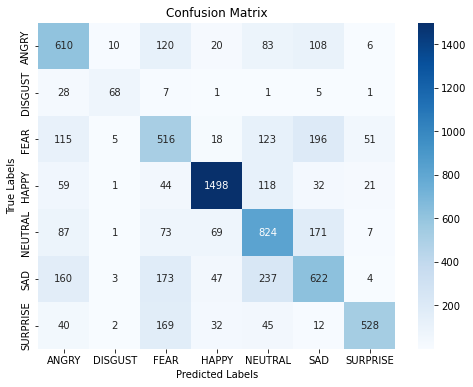

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Define class labels
class_labels = ["ANGRY", "DISGUST", "FEAR","HAPPY", "NEUTRAL", "SAD","SURPRISE"]

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## CLASSIFICATION REPORT

In [39]:
report = classification_report(y_test, y_pred3)

# Print classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.59       957
           1       0.76      0.61      0.68       111
           2       0.47      0.50      0.49      1024
           3       0.89      0.84      0.87      1773
           4       0.58      0.67      0.62      1232
           5       0.54      0.50      0.52      1246
           6       0.85      0.64      0.73       828

    accuracy                           0.65      7171
   macro avg       0.66      0.63      0.64      7171
weighted avg       0.66      0.65      0.65      7171



## ACCURACY,PRECISION ,RECALL ,F1-CORE

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4%}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 65.0676%
Precision: 0.6643
Recall: 0.6507
F1-Score: 0.6542


## TRAIN VS TEST ACCURACY

In [41]:
import pickle

# Specify the path to your pickle file
file_path = "model3_senet50/history3.pickle"

# Open the pickle file in binary mode
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    history3 = pickle.load(file)

# Now, 'data' contains the content of the pickle file
# print(history2)

Minimum validation loss: 0.9054236456199929


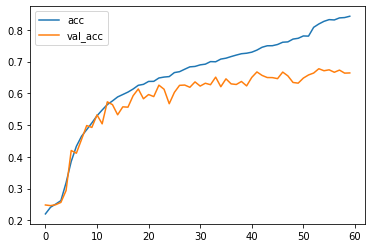

In [42]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['acc', 'val_acc']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))